## Feature Extraction

1) Time and frequency domain

2) Mean, median, standard deviation, peak values

3) Absolute integral

4) Power ratio of the frequency bands 0-2.75Hz and 0-5Hz

5) Peak frequency of the power spectral density (PSD)

6) Spectral entropy of the normalized PSD

7) Take synchronized data from the three IMUs: Mean, standard deviation, absolute integral and energy are calculated on 3 axes of each of the IMUs pairwise

8) Heart rate: features (normalized) mean and gradient. (Note: Normalization is done on the interval defined by resting and maximum HR)

9) And more...

In [1]:
import dataprocess as dp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Prepare samples

In [51]:
# Load all protocol subjects
colName=dp.exportColName()
data=dp.loadAllSubjects()

In [52]:
# Remove actID=0 and acc6g and orientation data
effectiveData=dp.removeAct0(data)
effectiveData=dp.removeAcc6gOri(effectiveData)

In [53]:
# Fill NaN by linear interpolation
noNaNData=dp.interpolateNaN(effectiveData, method='linear')

In [54]:
# Remove heads and tails of all activities from all subjects:
actDict=dp.throwAllHeadsAndTails(noNaNData, dt=10)

In [55]:
# Cut all spectra into 1-sec-long segments:
dataDict=dp.chopAllSpectra(actDict, duration=5.12, withT=True)

Checking discontinuity Count...
actID=1,	 count=0/1761
actID=2,	 count=0/1687
actID=3,	 count=0/1735
actID=17,	 count=0/2222
actID=16,	 count=0/1589
actID=12,	 count=0/808
actID=13,	 count=0/660
actID=4,	 count=0/2218
actID=7,	 count=0/1726
actID=6,	 count=0/1496
actID=5,	 count=0/847
actID=24,	 count=0/374


In [83]:
print('Total segment counts =', sum([dataDict[a].shape[0] for a in list(actDict.keys())]))

Total segment counts = 17123


**Note: Now we have 17123 spectrum segments from 9 protocol subjects: **

1) Each have 33 columns (31 features + actID + timestamp) and 512 rows (5.12 sec long).

2) Each segment is from the a single subject (don't have two spectra from two subjects merged into one).

3) Each segment belongs to one activity (a spectrum segment won't be the transition between two activities).

**We can view the each segment as the following:**

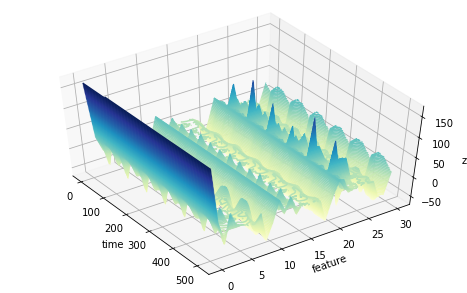

In [58]:
# Show a segment (the no.101 data of actID=5) (without showing timestamp and actID in the contour)
dp.showContour(dataDict[5][100][:, 2:])

## Feature Extraction: Time domain

Help with tsfresh package.

In [59]:
import tsfresh.feature_extraction.feature_calculators as ft_cal

In [60]:
# 1. Create a dictionary to store the feature data for actID=5
# 2. Transform segment data format into tsfresh-compatible format:
act5DFlist=[]
for i in range(len(dataDict[5])):
    act5DFlist.append(dp.toTsfreshFormat(dataDict[5][i]))

act17DFlist=[]
for i in range(len(dataDict[5])):
    act17DFlist.append(dp.toTsfreshFormat(dataDict[17][i]))

In [61]:
act17DFlist[25].head()

,activityID,timestamp,heart_rate,hand_temp,hand_acc16g_x,hand_acc16g_y,hand_acc16g_z,hand_gyro_x,hand_gyro_y,hand_gyro_z,...,ankle_temp,ankle_acc16g_x,ankle_acc16g_y,ankle_acc16g_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z
0,17.0,893.05,100.0,33.25,-2.89722,2.83408,7.41520,0.135691,1.16435,0.780773,...,33.8125,9.77243,-1.048260,-0.179584,-0.123134,0.111788,-0.060290,-61.6433,-16.2675,38.2781
1,17.0,893.06,100.0,33.25,-2.92323,2.23137,7.87869,0.202494,1.17050,0.689092,...,33.8125,9.81975,-1.051390,0.168227,-0.087035,0.117513,-0.015241,-61.2066,-15.7248,37.7852
2,17.0,893.07,100.0,33.25,-2.81066,2.11668,7.88076,0.193440,1.13596,0.595943,...,33.8125,9.81245,-0.973201,-0.102460,-0.139783,0.069501,-0.044188,-60.9853,-15.9435,37.0384
3,17.0,893.08,100.0,33.25,-2.71690,2.42364,8.34298,0.239003,1.10288,0.550348,...,33.8125,9.66356,-1.238670,-0.025161,-0.083829,0.139882,-0.038654,-62.0948,-16.2468,37.9107
4,17.0,893.09,100.0,33.25,-2.46290,3.26191,8.95975,0.290973,1.01048,0.442759,...,33.8125,9.69698,-1.161690,-0.179654,-0.023806,0.045921,-0.037802,-61.9775,-16.6905,37.7812


### 1) Mean, median, standard deviation, peak values, absolute integral

In [62]:
hand_acc16g_x_mean5 = np.array([ft_cal.mean(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_median5 = np.array([ft_cal.median(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_absEnergy5 = np.array([ft_cal.abs_energy(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_max5 = np.array([ft_cal.maximum(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_min5 = np.array([ft_cal.minimum(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_std5 = np.array([ft_cal.standard_deviation(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])

hand_acc16g_x_mean17 = np.array([ft_cal.mean(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_median17 = np.array([ft_cal.median(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_absEnergy17 = np.array([ft_cal.abs_energy(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_max17 = np.array([ft_cal.maximum(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_min17 = np.array([ft_cal.minimum(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_std17 = np.array([ft_cal.standard_deviation(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])

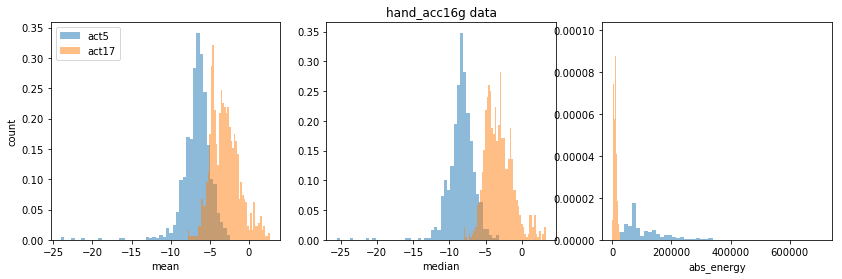

In [92]:
plt.figure(figsize=[14, 4])
plt.subplot(131)
plt.hist(hand_acc16g_x_mean5, bins=50, label='act5', alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_mean17, bins=50, label='act17', alpha=0.5, normed=True)
plt.xlabel('mean')
plt.ylabel('count')
plt.legend()
plt.subplot(132)
plt.hist(hand_acc16g_x_median5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_median17, bins=50, alpha=0.5, normed=True)
plt.xlabel('median')
plt.title('hand_acc16g data')
plt.subplot(133)
plt.hist(hand_acc16g_x_absEnergy5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_absEnergy17, bins=50, alpha=0.5, normed=True)
plt.xlabel('abs_energy');

**Note1: Here are the histogram of three different features (mean, median, abs_energy). I'm comparing the distribution of these features between different activities (actID=5(running) and 17(ironing)). If we can tell the activities apart by looking at these distribution, then that feature could be a good feature to involve in developing a classifier. **

**Note2: Mean and median are both good features (though I like the median better because it is in a nicer single mode, and the two bunches (maybe) seperate further than the mean). **

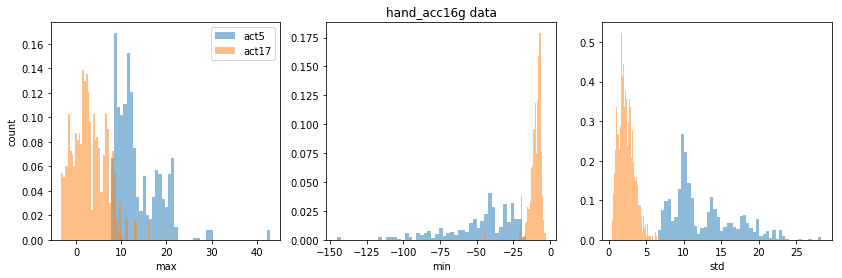

In [82]:
plt.figure(figsize=[14, 4])
plt.subplot(131)
plt.hist(hand_acc16g_x_max5, bins=50, label='act5', alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_max17, bins=50, label='act17', alpha=0.5, normed=True)
plt.xlabel('max')
plt.ylabel('count')
plt.legend()
plt.subplot(132)
plt.hist(hand_acc16g_x_min5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_min17, bins=50, alpha=0.5, normed=True)
plt.xlabel('min')
plt.title('hand_acc16g data')
plt.subplot(133)
plt.hist(hand_acc16g_x_std5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_std17, bins=50, alpha=0.5, normed=True)
plt.xlabel('std');

**Note: max and min distributions actually match the result of std distribution. The absolute values of min and max of act17 are both smaller than act5 might suggest act17 has smaller standard deviation. We may consider only include std or (min, max) into the model.**